In [74]:
import pandas, scipy, numpy, seaborn
import matplotlib, matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [75]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [76]:
file_directory = "/Users/kja11/OneDrive - Menntaský (1)/Mild_Hypothermia_project/in_silico/Python/"

In [77]:
path = "1) input/RNAseq/"

# II] Data Download

## a. Expression File

In [78]:
#data all_counts_filtered
df_count = pandas.read_csv(file_directory+path+ 'transcript_HEK293_temp_all_counts_unfiltered.tsv',
                     sep = '\t')
print(df_count.shape)
df_count.head()

(135603, 9)


,gene_id,gene_name,feature_id,s37rep2,s32rep3,s37rep1,s37rep3,s32rep1,s32rep2
0,ENSG00000198034,RPS4X,ENST00000316084,232646,199874,190685,196125,160799,177622
1,ENSG00000142937,RPS8,ENST00000396651,191357,163277,156765,160123,133777,150626
2,ENSG00000182774,RPS17,ENST00000647841,188996,163258,157911,153051,133896,156007
3,ENSG00000229117,RPL41,ENST00000546591,182501,170503,142081,168055,126151,146154
4,ENSG00000142937,RPS8,ENST00000485390,182336,155347,148909,154214,126332,142296


In [79]:
# Remove the non expressed transcripts (less than 10 counts)
full_leng = len(df_count)
df_count = df_count[df_count.max(axis=1) >= 10]

filtr_leng = len(df_count)
dropped_transcripts = full_leng - filtr_leng

print(f'On {full_leng}, {dropped_transcripts} transcripts do not exceed 10 counts')

df_count

On 135603, 68143 transcripts do not exceed 10 counts


C:\Users\kja11\AppData\Local\Temp\ipykernel_86004\2379892154.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count = df_count[df_count.max(axis=1) >= 10]


,gene_id,gene_name,feature_id,s37rep2,s32rep3,s37rep1,s37rep3,s32rep1,s32rep2
0,ENSG00000198034,RPS4X,ENST00000316084,232646,199874,190685,196125,160799,177622
1,ENSG00000142937,RPS8,ENST00000396651,191357,163277,156765,160123,133777,150626
2,ENSG00000182774,RPS17,ENST00000647841,188996,163258,157911,153051,133896,156007
3,ENSG00000229117,RPL41,ENST00000546591,182501,170503,142081,168055,126151,146154
4,ENSG00000142937,RPS8,ENST00000485390,182336,155347,148909,154214,126332,142296
...,...,...,...,...,...,...,...,...,...
121734,ENSG00000185513,L3MBTL1,ENST00000648570,0,0,1,16,0,1
125156,ENSG00000079337,RAPGEF3,ENST00000395360,0,0,0,24,0,0
125157,ENSG00000079337,RAPGEF3,ENST00000479866,0,0,0,12,0,1
125332,ENSG00000134900,TPP2,ENST00000698386,0,0,0,4,10,4


In [80]:
# calculate mean
df_count = df_count.assign(mean_32C = (df_count[['s37rep1', 's37rep2', 's37rep3']].mean(axis=1).round(0)),
                           mean_37C = (df_count[['s32rep1', 's32rep2', 's32rep3']].mean(axis=1).round(0))) 

df_count.rename(columns={df_count.columns[2]: 'transcript_id'},inplace=True)
df_count = df_count[['transcript_id','gene_name', 'mean_37C', 'mean_32C']]
print(len(df_count))
df_count.head()

67460


,transcript_id,gene_name,mean_37C,mean_32C
0,ENST00000316084,RPS4X,179432.0,206485.0
1,ENST00000396651,RPS8,149227.0,169415.0
2,ENST00000647841,RPS17,151054.0,166653.0
3,ENST00000546591,RPL41,147603.0,164212.0
4,ENST00000485390,RPS8,141325.0,161820.0


## b. Transcript information file

In [81]:
%%time
#data DETseq HEK293 
df_length = pandas.read_csv(file_directory+path+ '20240216_mytranscripts.gtf',
                               sep = '\t', comment='#', header=None)
print(df_length.shape)

df_length.columns = ["seqname", "source", "feature", "start", "end",
                  "score", "strand", "frame", "attribute"]
df_length.head()

<timed exec>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


(2704200, 9)
CPU times: total: 7.23 s
Wall time: 17.4 s


,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,transcript,3069168,3434342,.,+,.,"gene_id ""ENSG00000142611""; gene_version ""17""; ..."
1,1,havana,exon,3069168,3069296,.,+,.,"gene_id ""ENSG00000142611""; gene_version ""17""; ..."
2,1,havana,CDS,3069260,3069296,.,+,0,"gene_id ""ENSG00000142611""; gene_version ""17""; ..."
3,1,havana,start_codon,3069260,3069262,.,+,0,"gene_id ""ENSG00000142611""; gene_version ""17""; ..."
4,1,havana,exon,3186125,3186474,.,+,.,"gene_id ""ENSG00000142611""; gene_version ""17""; ..."


In [82]:
# Only select full transcripts
df_length = df_length[df_length["feature"] == "transcript"]
# extract ID
df_length['transcript_id'] = df_length['attribute'].str.extract('transcript_id "([^"]+)"')
# Calculate size
df_length['transcript_length'] = df_length['end'] - df_length['start'] + 1

# df_length.set_index('transcript_id', inplace = True, drop = True )
df_length = df_length[['transcript_id', 'transcript_length']]
df_length

,transcript_id,transcript_length
0,ENST00000511072,365175
37,ENST00000378391,366225
76,ENST00000514189,365132
113,ENST00000270722,369419
152,ENST00000512462,195995
...,...,...
2704146,ENST00000707304,14213
2704165,ENST00000707305,14219
2704184,ENST00000707306,970
2704189,ENST00000631997,6385


## c. Annotated data

In [83]:
#data DEseq HEK293 
df_annotated = pandas.read_csv(file_directory+'1) input/RNAseq/from_output/DETranscripts_HEK293_temp_annotated.csv',
                               sep = ',')

print(len(df_annotated))
df_annotated = df_annotated.dropna(axis=0)
print(len(df_annotated))
df_annotated.head(2)

67460
57574


,transcript_id,Gene name,Transcript name,gene_id,Gene type,Transcript type,Gene description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENST00000316084,RPS4X,RPS4X-201,ENSG00000198034,protein_coding,protein_coding,ribosomal protein S4 X-linked [Source:HGNC Sym...,191445.754149,0.16671,0.237639,0.701529,0.482973,0.926364
1,ENST00000396651,RPS8,RPS8-202,ENSG00000142937,protein_coding,protein_coding,ribosomal protein S8 [Source:HGNC Symbol;Acc:H...,158035.042472,0.18438,0.233656,0.789108,0.430049,0.912718


## d. Merge

In [93]:
df = df_length.merge(df_count)

# calculate ratio - expression/size
df = df.assign(ratio_37C = df['mean_37C'] / df['transcript_length'],
               ratio_32C = df['mean_32C'] / df['transcript_length'])

df = df.merge(df_annotated)
df = df[['Transcript name','transcript_id', 'transcript_length', 'Transcript type',
         'mean_37C', 'mean_32C', 'ratio_37C', 'ratio_32C', 'padj']]
df.head(2)

,Transcript name,transcript_id,transcript_length,Transcript type,mean_37C,mean_32C,ratio_37C,ratio_32C,padj
0,PEX10-201,ENST00000288774,8601,protein_coding,41.0,56.0,0.004767,0.006511,0.971252
1,PEX10-202,ENST00000447513,8591,protein_coding,41.0,55.0,0.004772,0.006402,0.974911


## Subsets

In [101]:
# select the significant one (differentially expressed)
df_signif = df[(df.padj < 0.05)]
print(f'{len(df_signif)} transcripts are significantly different between 37° and 32°C')

df_signif.head(2)

694 transcripts are significantly different between 37° and 32°C


,Transcript name,transcript_id,transcript_length,Transcript type,mean_37C,mean_32C,ratio_37C,ratio_32C,padj
37,ZBTB40-202,ENST00000375647,79304,protein_coding,37.0,115.0,0.000467,0.001450,0.018159
38,ZBTB40-204,ENST00000404138,79307,protein_coding,40.0,117.0,0.000504,0.001475,0.027348


In [95]:
# select all the coding protein 
df_protcod = df[df['Transcript type'].str.startswith('protein_coding')] 
print(len(df_protcod))

df_protcod.head(2)

40920


,Transcript name,transcript_id,transcript_length,Transcript type,mean_37C,mean_32C,ratio_37C,ratio_32C,padj
0,PEX10-201,ENST00000288774,8601,protein_coding,41.0,56.0,0.004767,0.006511,0.971252
1,PEX10-202,ENST00000447513,8591,protein_coding,41.0,55.0,0.004772,0.006402,0.974911


In [99]:
# select the significant protein coding transcripts (differentially expressed)
df_signif_protcod = df[(df.padj < 0.1)] #higher pvalue because adjpvalue was calculated from all not only prot
df_signif_protcod = df_signif_protcod[df_signif_protcod['Transcript type'].str.startswith('protein_coding')] 
print(len(df_signif_protcod))

df_signif_protcod.head(2)

732


,Transcript name,transcript_id,transcript_length,Transcript type,mean_37C,mean_32C,ratio_37C,ratio_32C,padj
37,ZBTB40-202,ENST00000375647,79304,protein_coding,37.0,115.0,0.000467,0.001450,0.018159
38,ZBTB40-204,ENST00000404138,79307,protein_coding,40.0,117.0,0.000504,0.001475,0.027348


# Methods

## I] Only Significant

       transcript_length
count         694.000000
mean            4.157754
std             0.584964
min             2.724276
25%             3.739018
50%             4.206751
75%             4.588867
max             5.569642



Text(0.5, 0, 'log10(transcript length)')

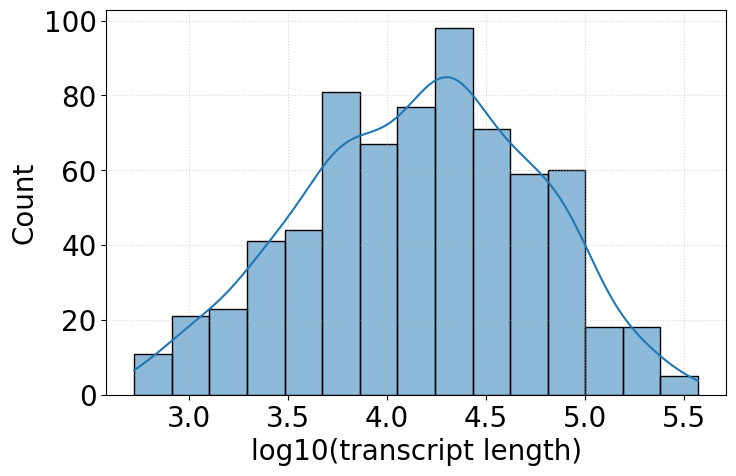

In [105]:
df_hist = df_signif[['transcript_length']].apply(numpy.log10)
values = df_hist.values.flatten()
bin_edges = numpy.arange(1, 7.5, 0.5) # Define the bin edges
hist, edges = numpy.histogram(values, bins=bin_edges) # Calculate the histogram

print(f'{df_hist.describe()}\n')
# Create a DataFrame for better visualization
bin_intervals = [f"{edges[i]} to {edges[i+1]}" for i in range(len(edges)-1)]
count_df = pandas.DataFrame({'Interval': bin_intervals, 'Count': hist})
# print(count_df)

seaborn.histplot(values, kde=True)
plt.xlabel('log10(transcript length)')

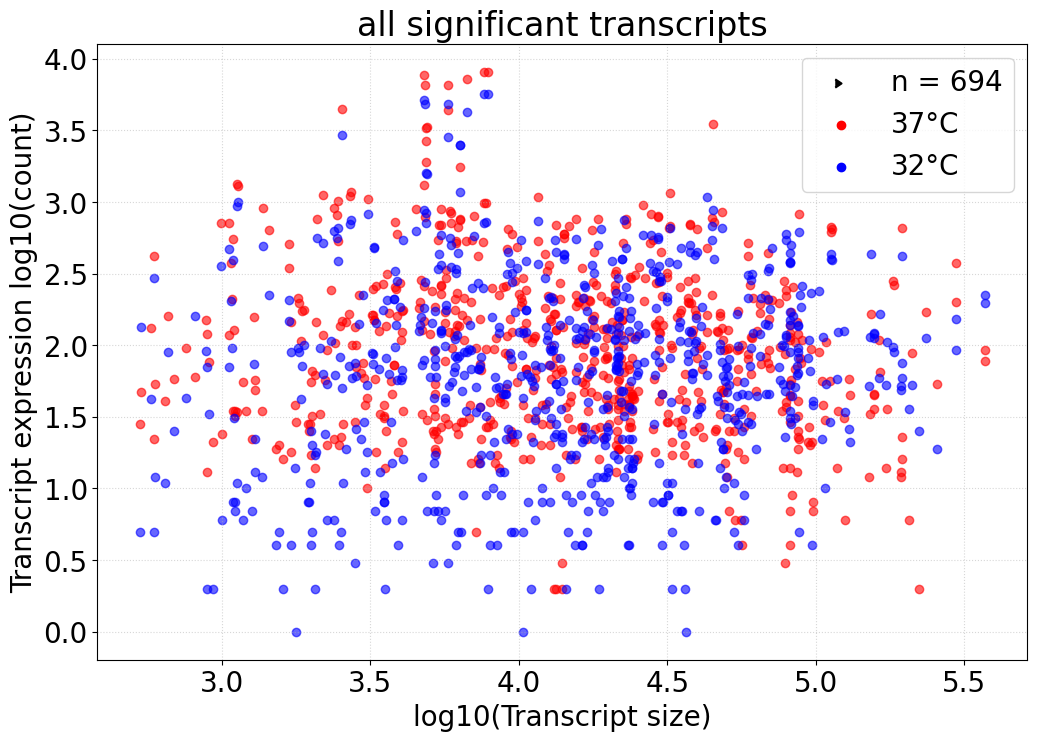

In [103]:
# plot expression on size
expr_37 = df_signif.mean_37C.apply(numpy.log10)
expr_32 = df_signif.mean_32C.apply(numpy.log10)
size = df_signif.transcript_length.apply(numpy.log10)

plt.figure(figsize=(12, 8))
plt.scatter(y = expr_37, x = size, alpha = 0.6, color = 'red')
plt.scatter(x=[],y=[], marker=5, color='k', label= f'n = {len(expr_37)}')
plt.scatter(x=[],y=[], marker="o", color='red', label= f'37°C')

plt.scatter(y = expr_32, x = size, alpha = 0.6, color = 'blue')
plt.scatter(x=[],y=[], marker="o", color='blue', label= f'32°C')

plt.title('all significant transcripts')
plt.xlabel('log10(Transcript size)')
plt.ylabel('Transcript expression log10(count)')
plt.legend()

Pearson corr score is: 0.9682989703344425, 0.0
Spearman corr score is: 0.8554770742804684, 5.929820294914098e-200


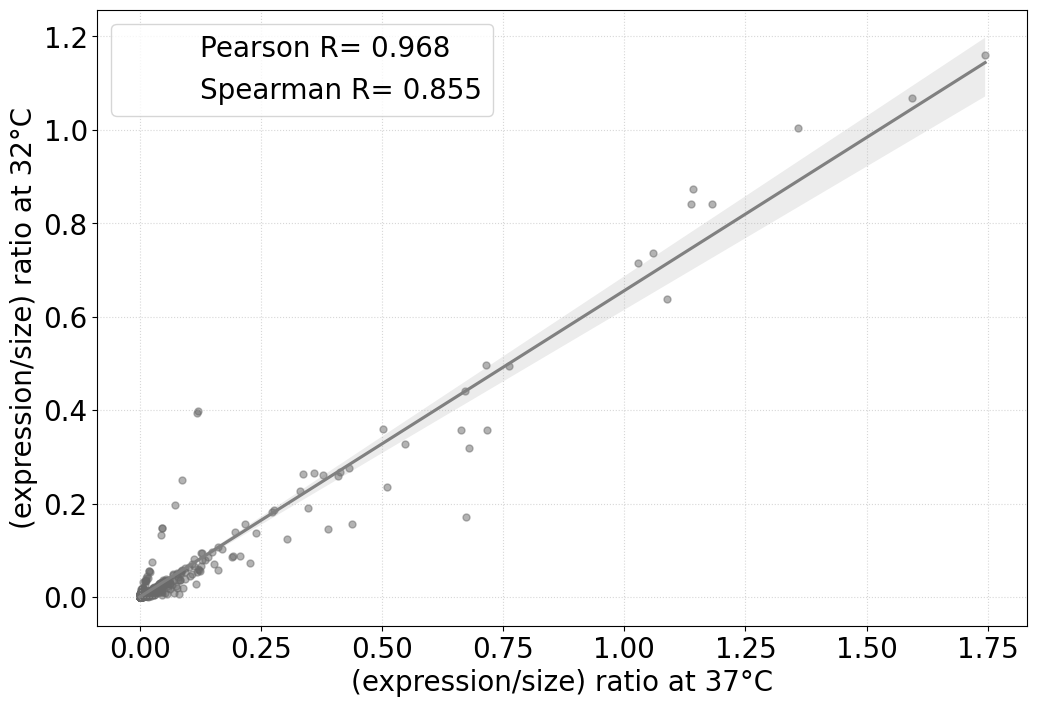

In [104]:
# Calculate correlation score
x= df_signif.ratio_37C
y= df_signif.ratio_32C

#stat Pearson correlation score 
r_value_pcs, p_value_pcs = scipy.stats.pearsonr(x, y)
print(f'Pearson corr score is: {r_value_pcs}, {p_value_pcs}')

#stat Spearman correlation score 
r_value_scs, p_value_scs = scipy.stats.spearmanr(x, y)
print(f'Spearman corr score is: {r_value_scs}, {p_value_scs}')

#graph
plt.figure(figsize=(12, 8))
seaborn.regplot(x=x,y=y, x_ci = 0, marker=".",
                scatter_kws={"color": "dimgrey", "alpha": 0.5, 's': 100}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Pearson R= {str(round(r_value_pcs,3))}')

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Spearman R= {str(round(r_value_scs,3))}')

plt.xlabel("(expression/size) ratio at 37°C")
plt.ylabel('(expression/size) ratio at 32°C')

plt.legend()

plt.show()  

## II] All protein coding transcripts

       transcript_length
count       40920.000000
mean            4.399332
std             0.577937
min             2.315970
25%             4.005738
50%             4.424097
75%             4.809958
max             6.392988

      Interval  Count
0   1.0 to 1.5      0
1   1.5 to 2.0      0
2   2.0 to 2.5      3
3   2.5 to 3.0    325
4   3.0 to 3.5   2443
5   3.5 to 4.0   7353
6   4.0 to 4.5  12458
7   4.5 to 5.0  12040
8   5.0 to 5.5   5425
9   5.5 to 6.0    839
10  6.0 to 6.5     34
11  6.5 to 7.0      0


Text(0.5, 0, 'log10(transcript length)')

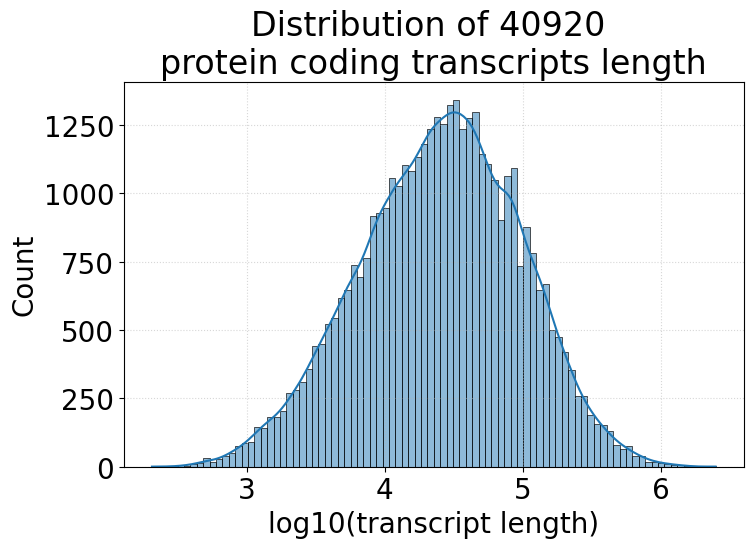

In [110]:
df_hist = df_protcod[['transcript_length']].apply(numpy.log10)
values = df_hist.values.flatten()
bin_edges = numpy.arange(1, 7.5, 0.5) # Define the bin edges
hist, edges = numpy.histogram(values, bins=bin_edges) # Calculate the histogram

print(f'{df_hist.describe()}\n')
# Create a DataFrame for better visualization
bin_intervals = [f"{edges[i]} to {edges[i+1]}" for i in range(len(edges)-1)]
count_df = pandas.DataFrame({'Interval': bin_intervals, 'Count': hist})
# print(count_df)

plt.title(f'Distribution of {len(values)} \nprotein coding transcripts length')
seaborn.histplot(values, kde=True)
plt.xlabel('log10(transcript length)')

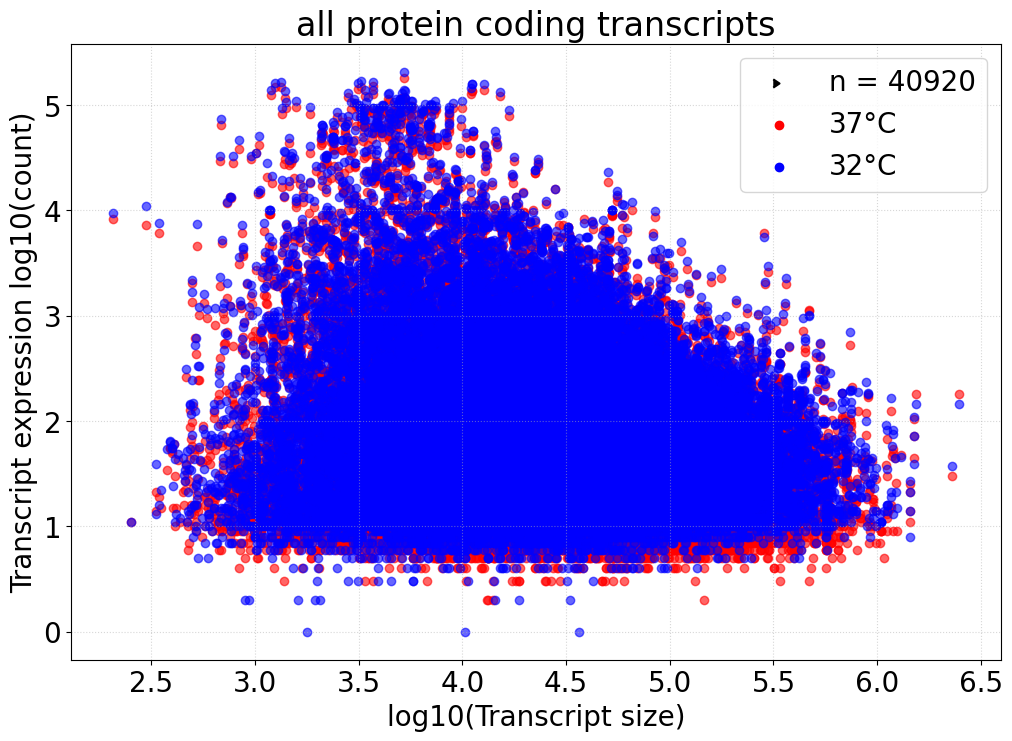

In [119]:
# plot expression on size
expr_37 = df_protcod.mean_37C.apply(numpy.log10)
expr_32 = df_protcod.mean_32C.apply(numpy.log10)
size = df_protcod.transcript_length.apply(numpy.log10)

plt.figure(figsize=(12, 8))
plt.scatter(y = expr_37, x = size, alpha = 0.6, color = 'red')
plt.scatter(x=[],y=[], marker=5, color='k', label= f'n = {len(expr_37)}')
plt.scatter(x=[],y=[], marker="o", color='red', label= f'37°C')

plt.scatter(y = expr_32, x = size, alpha = 0.6, color = 'blue')
plt.scatter(x=[],y=[], marker="o", color='blue', label= f'32°C')

plt.title('all protein coding transcripts')
plt.xlabel('log10(Transcript size)')
plt.ylabel('Transcript expression log10(count)')
plt.legend()

Pearson corr score is: 0.9986674975441956, 0.0
Spearman corr score is: 0.9834648020726293, 0.0


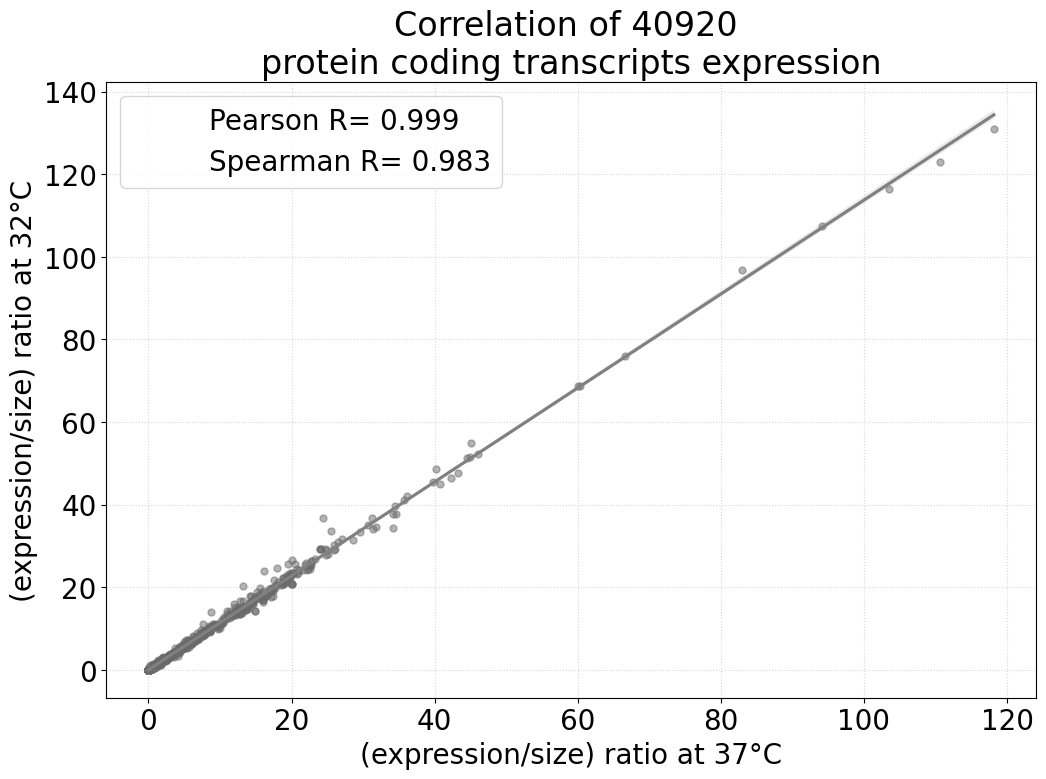

In [114]:
# Calculate correlation score
x= df_protcod.ratio_37C
y= df_protcod.ratio_32C

#stat Pearson correlation score 
r_value_pcs, p_value_pcs = scipy.stats.pearsonr(x, y)
print(f'Pearson corr score is: {r_value_pcs}, {p_value_pcs}')

#stat Spearman correlation score 
r_value_scs, p_value_scs = scipy.stats.spearmanr(x, y)
print(f'Spearman corr score is: {r_value_scs}, {p_value_scs}')

#graph
plt.figure(figsize=(12, 8))
seaborn.regplot(x=x,y=y, x_ci = 0, marker=".",
                scatter_kws={"color": "dimgrey", "alpha": 0.5, 's': 100}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Pearson R= {str(round(r_value_pcs,3))}')

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Spearman R= {str(round(r_value_scs,3))}')

plt.xlabel("(expression/size) ratio at 37°C")
plt.ylabel('(expression/size) ratio at 32°C')

plt.title(f'Correlation of {len(x)} \nprotein coding transcripts expression')
plt.legend()

plt.show()  

### III] Significant protein coding transcripts

       transcript_length
count         732.000000
mean            4.235755
std             0.577906
min             2.700704
25%             3.838581
50%             4.286432
75%             4.662063
max             5.569642

      Interval  Count
0   1.0 to 1.5      0
1   1.5 to 2.0      0
2   2.0 to 2.5      0
3   2.5 to 3.0     14
4   3.0 to 3.5     73
5   3.5 to 4.0    152
6   4.0 to 4.5    237
7   4.5 to 5.0    200
8   5.0 to 5.5     53
9   5.5 to 6.0      3
10  6.0 to 6.5      0
11  6.5 to 7.0      0


Text(0.5, 0, 'log10(transcript length)')

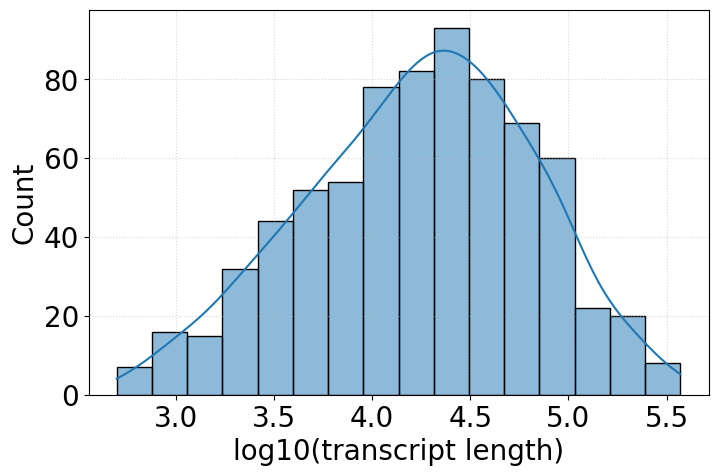

In [115]:
df_hist = df_signif_protcod[['transcript_length']].apply(numpy.log10)
values = df_hist.values.flatten()
bin_edges = numpy.arange(1, 7.5, 0.5) # Define the bin edges
hist, edges = numpy.histogram(values, bins=bin_edges) # Calculate the histogram

print(f'{df_hist.describe()}\n')
# Create a DataFrame for better visualization
bin_intervals = [f"{edges[i]} to {edges[i+1]}" for i in range(len(edges)-1)]
count_df = pandas.DataFrame({'Interval': bin_intervals, 'Count': hist})
# print(count_df)

seaborn.histplot(values, kde=True)
plt.xlabel('log10(transcript length)')

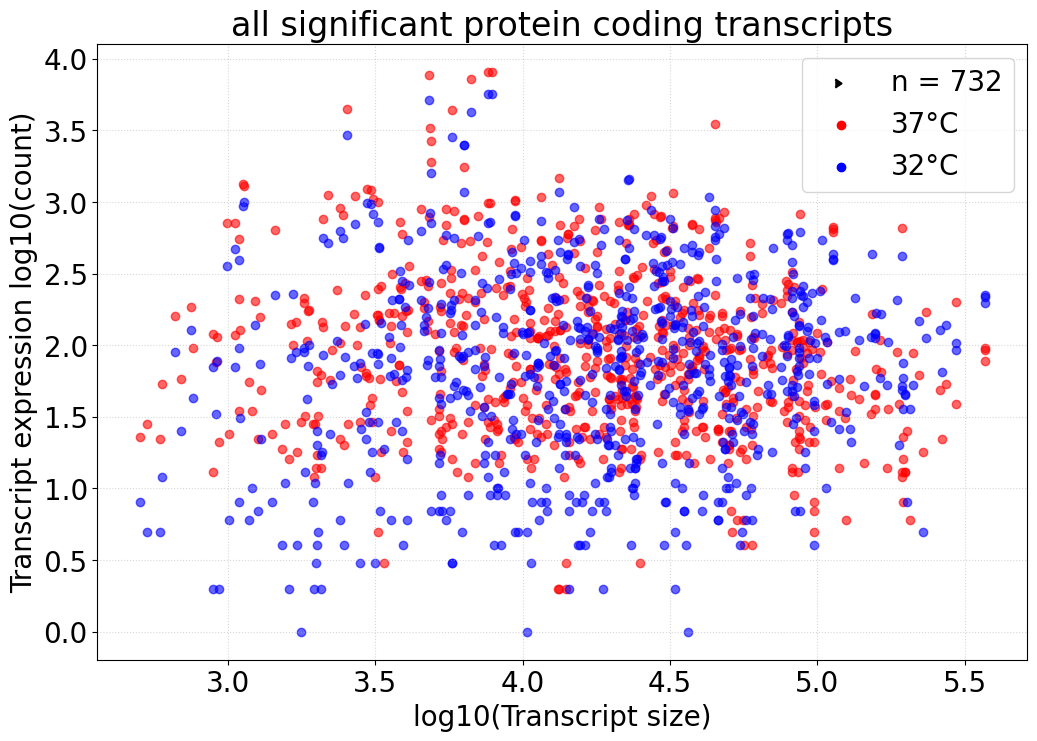

In [118]:
# plot expression on size
expr_37 = df_signif_protcod.mean_37C.apply(numpy.log10)
expr_32 = df_signif_protcod.mean_32C.apply(numpy.log10)
size = df_signif_protcod.transcript_length.apply(numpy.log10)

plt.figure(figsize=(12, 8))
plt.scatter(y = expr_37, x = size, alpha = 0.6, color = 'red')
plt.scatter(x=[],y=[], marker=5, color='k', label= f'n = {len(expr_37)}')
plt.scatter(x=[],y=[], marker="o", color='red', label= f'37°C')

plt.scatter(y = expr_32, x = size, alpha = 0.6, color = 'blue')
plt.scatter(x=[],y=[], marker="o", color='blue', label= f'32°C')

plt.title('all significant protein coding transcripts')
plt.xlabel('log10(Transcript size)')
plt.ylabel('Transcript expression log10(count)')
plt.legend()

Pearson corr score is: 0.9667964089188813, 0.0
Spearman corr score is: 0.8565635189411599, 6.266122023562884e-212


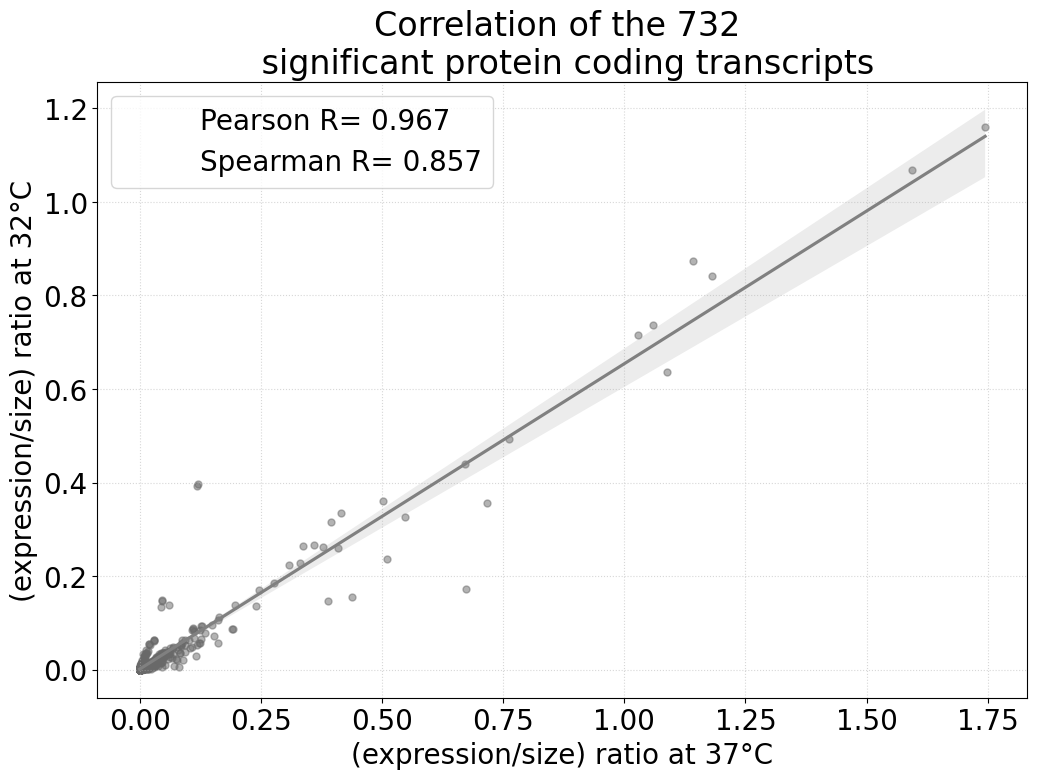

In [120]:
# Calculate correlation score
x= df_signif_protcod.ratio_37C
y= df_signif_protcod.ratio_32C

#stat Pearson correlation score 
r_value_pcs, p_value_pcs = scipy.stats.pearsonr(x, y)
print(f'Pearson corr score is: {r_value_pcs}, {p_value_pcs}')

#stat Spearman correlation score 
r_value_scs, p_value_scs = scipy.stats.spearmanr(x, y)
print(f'Spearman corr score is: {r_value_scs}, {p_value_scs}')

#graph
plt.figure(figsize=(12, 8))
seaborn.regplot(x=x,y=y, x_ci = 0, marker=".",
                scatter_kws={"color": "dimgrey", "alpha": 0.5, 's': 100}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Pearson R= {str(round(r_value_pcs,3))}')

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Spearman R= {str(round(r_value_scs,3))}')

plt.title(f"Correlation of the {len(values)} \n significant protein coding transcripts")
plt.xlabel("(expression/size) ratio at 37°C")
plt.ylabel('(expression/size) ratio at 32°C')

plt.legend()

plt.show()  